In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [8]:
df=pd.read_csv("C:/Users/dbda/PycharmProjects/statistics/Dataset/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
#Split the data set into prredictor variable x and target variable y
X=df.drop("Outcome",axis=1)
y=df['Outcome']

In [10]:
#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [11]:
#create and train a logistic regression model
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [12]:
#Make predictions 
y_test_prediction=classifier.predict(X_test)
y_train_prediction=classifier.predict(X_train)

In [13]:
#Display prediction comparisions
comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_test_prediction})
print(comparison.head(10))

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0


In [14]:
#Print accuray score
print(f"Test accuray :{accuracy_score(y_test,y_test_prediction):.4f}")
print(f"Train accuray :{accuracy_score(y_train,y_train_prediction):.4f}")

Test accuray :0.7749
Train accuray :0.7747


In [15]:
#Confusion  Matrix
conf_mat=confusion_matrix(y_test,y_test_prediction)
print("\n confusion matrix:")
print(conf_mat)


 confusion matrix:
[[132  14]
 [ 38  47]]


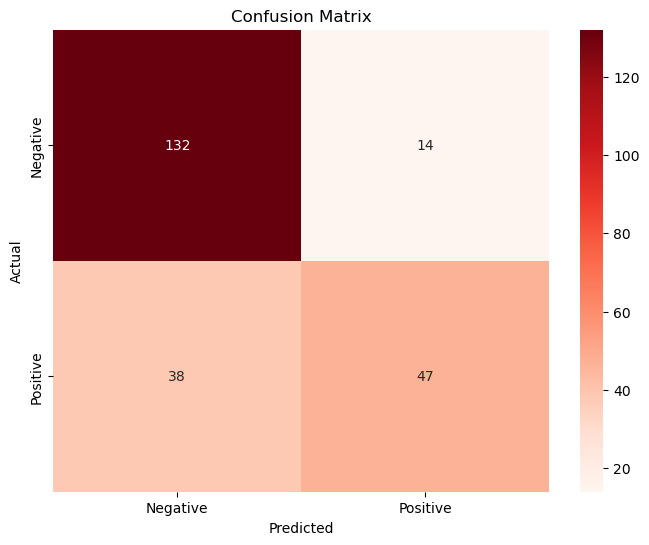

In [17]:
#Visualize confusion matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Reds',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
#Classification Report 
print("\n Classification Report:")
print(classification_report(y_test,y_test_prediction))



 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [19]:
#Calculate additional metrics
TN,FP,FN,TP=conf_mat.ravel()
recall=TP/(TP+FN)
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+FP+FN+TN)


In [20]:
print(f"Recall:{recall:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Specificity:{specificity:.4f}")
print(f"Accuracy:{accuracy:.4f}")

Recall:0.5529
Precision:0.7705
Specificity:0.9041
Accuracy:0.7749


In [21]:
#Another techinque
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [22]:
#Extract TP,TN,FP,FN from the confusion matrix
conf_mat=confusion_matrix(y_test,y_test_prediction)
TP=conf_mat[1,1]
TN=conf_mat[0,0]
FP=conf_mat[0,1]
FN=conf_mat[1,0]

#calculate accuray,precision,recall,f1 score
accuracy=accuracy_score(y_test,y_test_prediction)
precision=precision_score(y_test,y_test_prediction)
recall=recall_score(y_test,y_test_prediction)
f1=f1_score(y_test,y_test_prediction)



In [25]:
#Print the results
print(f"Recall:{recall:.4f}")
print(f"Precision:{precision:.4f}")
print(f"F1-Score:{f1:.4f}")
print(f"Accuracy:{accuracy:.4f}")

Recall:0.5529
Precision:0.7705
F1-Score:0.6438
Accuracy:0.7749
